Media a posteriori a lui λ: 16.4545
Modul a posteriori al lui λ: 16.3636
Intervalul HDI de 94% pentru λ: [14.1297, 18.6623]



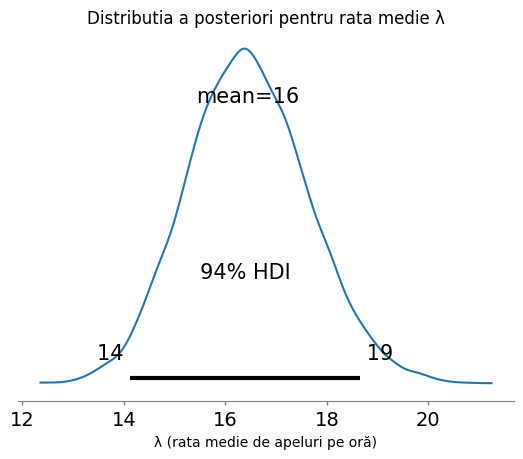

In [24]:
#estimam rata medie de apeluri telefonice folosind inferenta bayesiana
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

#rata medie de apeluri pe ora e modelata de o distributie gamma condit. de datele observate
#nr apeluri observate, timpul total
k = 180
T = 10
#parametrii initiali distributiei
alpha_prior = 1
beta_prior = 1

#parametrii posteriori
alpha_post = alpha_prior + k
beta_post = beta_prior + T

#un interval de valori pt lambda(rate posibile)
lambda_values = np.linspace(0.001, 30, 1000)

#functia de densitate a posteriori(calculam cu distributia gamma si parametri posteriori)
posterior_pdf = stats.gamma.pdf(lambda_values, a=alpha_post, scale=1/beta_post)

#media, modulul
medie_lambda = alpha_post / beta_post
modul_lambda = (alpha_post - 1) / beta_post if alpha_post > 1 else 0
#generez mostre din distributia posteriori
samples = stats.gamma(alpha_post, scale=1/beta_post).rvs(10000)

#calculez intervalul hdi unde se afla 94% din densitatea prob. pentru lambda (regiunea de incredere)
hdi_interval = az.hdi(samples, hdi_prob=0.94)
lower_bound = hdi_interval[0]
upper_bound = hdi_interval[1]

print(f"Media a posteriori a lui λ: {medie_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {modul_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

#graficul distributiei
az.plot_posterior(samples, hdi_prob=0.94)
plt.title("Distributia a posteriori pentru rata medie λ")
plt.xlabel("λ (rata medie de apeluri pe oră)")
plt.show()